### Importing libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Reading csv file that we'll be using

In [4]:
df = pd.read_csv(r"C:\Users\Germán\Github\Data_Analysis_Project1\Data\data.csv")

In [6]:
df.head(3)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium


### Initial data inspection

In [7]:
df.shape # To see dimensions

(5000, 19)

In [9]:
df.dtypes 

Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object

In [12]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum() / df.shape[0] * 100 #La cantidad de datos nulos en porcentaje

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64

<Axes: >

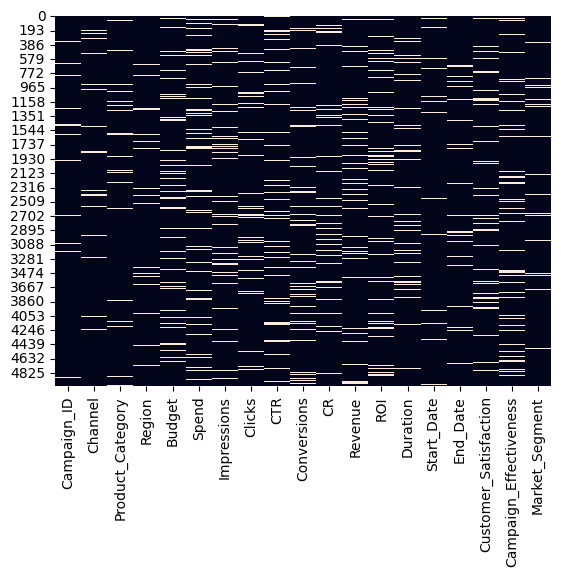

In [14]:
sns.heatmap(df.isnull(), cbar=False)

### Fixing null data using the media for numeric data and moda for non-numeric

<Axes: xlabel='ROI', ylabel='Count'>

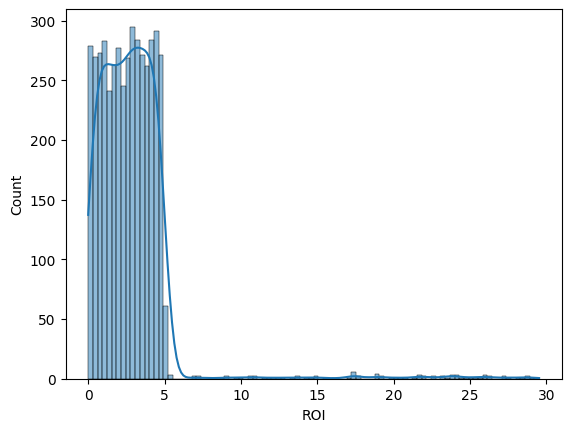

In [23]:
sns.histplot(df['ROI'], kde=True)